## CSCI S89A DL for NLP
## `Assignment 04`    	
## Handed out: 07/17/2019                             
## Due by 11:59 PM EST on Tuesday, 07/23/2019
## Submitted by: Saurabh Kulkarni

**Step 0:** Import all the required libraries.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install -q tensorflow-gpu==2.0.0-alpha0
# Import TensorFlow >= 1.10 and enable eager execution
import tensorflow as tf
tf.enable_eager_execution()

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import unicodedata
import re   # regular expression
import numpy as np
import os
import time

print(tf.__version__)

1.14.0


### Problem 1 (15%)

Represent the following expressions in TensorFlow:
$$y=2x^{2}+5$$
$$z=\frac{(3y-4)}{x}$$

Calculate and print the value of $y$ where $x$ is a series of values starting with 1, incremented by 1 and ending at 9. Define variable $x$ with a placeholder so that you could feed different values of $x$ while calculating $y$. Use Session.run() method which is fed different $x$ values through a fetch_dict(ionary). Similarly, calculate and print values of $z$. Generate a TensorBoard graph of your calculations.

In [37]:
x_data = np.linspace(1,9,9).reshape(9,1)
x_data_T = x_data.reshape(1,9)
x_data
# x_data_2 = x_data*x_data
# x_data_2

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [40]:
with tf.Graph().as_default():
    x = tf.placeholder(tf.float32,shape=(9,1))
    x_T = tf.placeholder(tf.float32,shape=(1,9))
    const2 = tf.fill((9,1),2.0)
    const3 = tf.fill((9,1),3.0)
    const4 = tf.fill((9,1),4.0)
    const5 = tf.fill((9,1),5.0)
    xx = tf.multiply(x,x,name='x_sq')
    y = tf.multiply(const2,xx)+const5
    z_num = tf.multiply(y,const3)-const4
    z = z_num/x
    
    with tf.Session() as sess:
        outs_y = sess.run(y,feed_dict={x: x_data, x_T: x_data_T})
        outs_z = sess.run(z,feed_dict={x: x_data, x_T: x_data_T})
#         print (sess.run(ymax))

print("y = {}".format(outs_y))
print("z = {}".format(outs_z))

y = [[  7.]
 [ 13.]
 [ 23.]
 [ 37.]
 [ 55.]
 [ 77.]
 [103.]
 [133.]
 [167.]]
z = [[17.      ]
 [17.5     ]
 [21.666666]
 [26.75    ]
 [32.2     ]
 [37.833332]
 [43.57143 ]
 [49.375   ]
 [55.22222 ]]


### Problem 2 (25%)

Consider 100 points along the straight line in (x,y) plane represented by the linear equation $y=0.3x+0.2$. Distribute those points along the line uniformly in the interval between -2.0 and 3.0. To the y coordinate of each point add a random normally distributed value with standard deviation of 1 and mean 0. You have created and artificial set of random measurements. Create a shallow neural network with one layer which will be able to predict y value corresponding to any x value in the above interval. Implement and train the network using TensorFlow API. Report on the accuracy of your model. This is a rather trivial problem and you do not need neural networks to solve it. We are practicing TensorFlow API. This was problem #2 of your Problem set #1. Then we did it with Keras. Now, you are asked to implement this problem in TensorFlow.

In [77]:
X = np.random.uniform(low=-2.0, high=3.0, size=100).reshape(100,1)
X.shape

(100, 1)

In [78]:
line = 0.3*X + 0.2 
noise = np.random.normal(loc=0, scale=0.1, size=100).reshape(100,1)
Y = line+noise
Y.shape

(100, 1)

In [79]:
# np.random.seed(9001)
# mask = np.random.rand(100) < 0.7 
# x_train = X[mask]
# x_test = X[~mask]
# y_train = Y[mask]
# y_test = Y[~mask]

In [88]:
tf.reset_default_graph()

# g = tf.Graph()

# with g.as_default():

x = tf.placeholder(tf.float32, shape=(100,1), name='x')
y = tf.placeholder(tf.float32, shape=(100,1), name='y')

w = tf.Variable(tf.random_uniform(shape=(1,1)), name='w')
b = tf.Variable(tf.random_uniform(shape=(1,1)), name='b')

y_pred = tf.matmul(x, tf.transpose(w))+b

error = y_pred - y
mse = 0.5*tf.reduce_mean(tf.square(error), name='mse')
learning_rate = 0.001

grad_w = tf.matmul(tf.transpose(x), error)
grad_b = tf.reduce_sum(error)
train_w = tf.assign(w, w-learning_rate*grad_w)
train_b = tf.assign(b, b-learning_rate*grad_b)

In [89]:
feedDict = {x: X, y:Y}
reportStep = 500
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(5000):
        w_c, b_c,_,_,y_result, mse_result = sess.run([w,b,train_w,train_b,y_pred,mse], feed_dict=feedDict)
        
        if (epoch) % reportStep == 0:
            print('Epoch: ', epoch+1)
            print('\terror: ', mse_result)
            print('\tcurrent w: ', w_c)
            print('\tcurrent b:', b_c)
            
            
    print('\nFinal values:')
    print('\tepochs: ',epoch+1)
    print('\terror: ',mse_result)
    print('\tw: ', w_c)
    print('\tb: ', b_c)
#     print('\tPredicted y: ', y_result)
#     print('\tActual y: ', Y)

Epoch:  1
	error:  0.08712674
	current w:  [[0.12125444]]
	current b: [[0.5829643]]
Epoch:  501
	error:  0.0054062153
	current w:  [[0.29845876]]
	current b: [[0.19641325]]
Epoch:  1001
	error:  0.0054062153
	current w:  [[0.29845876]]
	current b: [[0.19641325]]
Epoch:  1501
	error:  0.0054062153
	current w:  [[0.29845876]]
	current b: [[0.19641325]]
Epoch:  2001
	error:  0.0054062153
	current w:  [[0.29845876]]
	current b: [[0.19641325]]
Epoch:  2501
	error:  0.0054062153
	current w:  [[0.29845876]]
	current b: [[0.19641325]]
Epoch:  3001
	error:  0.0054062153
	current w:  [[0.29845876]]
	current b: [[0.19641325]]
Epoch:  3501
	error:  0.0054062153
	current w:  [[0.29845876]]
	current b: [[0.19641325]]
Epoch:  4001
	error:  0.0054062153
	current w:  [[0.29845876]]
	current b: [[0.19641325]]
Epoch:  4501
	error:  0.0054062153
	current w:  [[0.29845876]]
	current b: [[0.19641325]]

Final values:
	epochs:  5000
	error:  0.0054062153
	w:  [[0.29845876]]
	b:  [[0.19641325]]


### Problem 3 (10%)
Using code in the attached file named graph_and_summaries.py, demonstrate complex TensorBoard Graphs and Summaries. Capture a few of resulting graphs and summaries. Demonstrate that nested graphs could be expanded and collapsed. Please fix the code if it needs fixing. Provide us with working code. Code is a bit old and you might have to replace older TF calls with the current versions. This code paints several TensorBoard graphs displayed in the notes for Lecture 7.

In [1]:
import tensorflow as tf
import numpy as np

# Explicitly create a Graph object
graph = tf.Graph()

with graph.as_default():
    
    with tf.name_scope("variables"):
        # Variable to keep track of how many times the graph has been run
        global_step = tf.Variable(0, dtype=tf.int32, name="global_step")
        
        # Increments the above `global_step` Variable, should be run whenever the graph is run
        increment_step = global_step.assign_add(1)
        
        # Variable that keeps track of previous output value:
        previous_value = tf.Variable(0.0, dtype=tf.float32, name="previous_value")
    
    # Primary transformation Operations
    with tf.name_scope("exercise_transformation"):
        
        # Separate input layer
        with tf.name_scope("input"):
            # Create input placeholder- takes in a Vector 
            a = tf.placeholder(tf.float32, shape=[None], name="input_placeholder_a")
    
        # Separate middle layer
        with tf.name_scope("intermediate_layer"):
            b = tf.reduce_prod(a, name="product_b")
            c = tf.reduce_sum(a, name="sum_c")
        
        # Separate output layer
        with tf.name_scope("output"):
            d = tf.add(b, c, name="add_d")
            output = tf.subtract(d, previous_value, name="output")
            update_prev = previous_value.assign(output)
    
    # Summary Operations
    with tf.name_scope("summaries"):
        tf.summary.scalar(name="output_summary", tensor=output)  # Creates summary for output node
        tf.summary.scalar(name="prod_summary", tensor=b)
        tf.summary.scalar(name="sum_summary", tensor=c)
    
    # Global Variables and Operations
    with tf.name_scope("global_ops"):
        # Initialization Op
        init = tf.initialize_all_variables()
        # Collect all summary Ops in graph
        merged_summaries = tf.summary.merge_all()

# Start a Session, using the explicitly created Graph
sess = tf.Session(graph=graph)

# Open a SummaryWriter to save summaries
writer = tf.summary.FileWriter('./improved_graph', graph)

# Initialize Variables
sess.run(init)

def run_graph(input_tensor):
    """
    Helper function; runs the graph with given input tensor and saves summaries
    """
    feed_dict = {a: input_tensor}
    output, summary, step = sess.run([update_prev, merged_summaries, increment_step], feed_dict=feed_dict)
    writer.add_summary(summary, global_step=step)


# Run the graph with various inputs
run_graph([2,8])
run_graph([3,1,3,3])
run_graph([8])
run_graph([1,2,3])
run_graph([11,4])
run_graph([4,1])
run_graph([7,3,1])
run_graph([6,3])
run_graph([0,2])
run_graph([4,5,6])

# Writes the summaries to disk
writer.flush()

# Flushes the summaries to disk and closes the SummaryWriter
writer.close()

# Close the session
sess.close()

# To start TensorBoard after running this file, execute the following command:
# $ tensorboard --logdir='./improved_graph'

W0720 20:20:31.402797 140643581441856 deprecation.py:323] From /home/srk-apts/anaconda3/envs/s89a/lib/python3.7/site-packages/tensorflow/python/util/tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


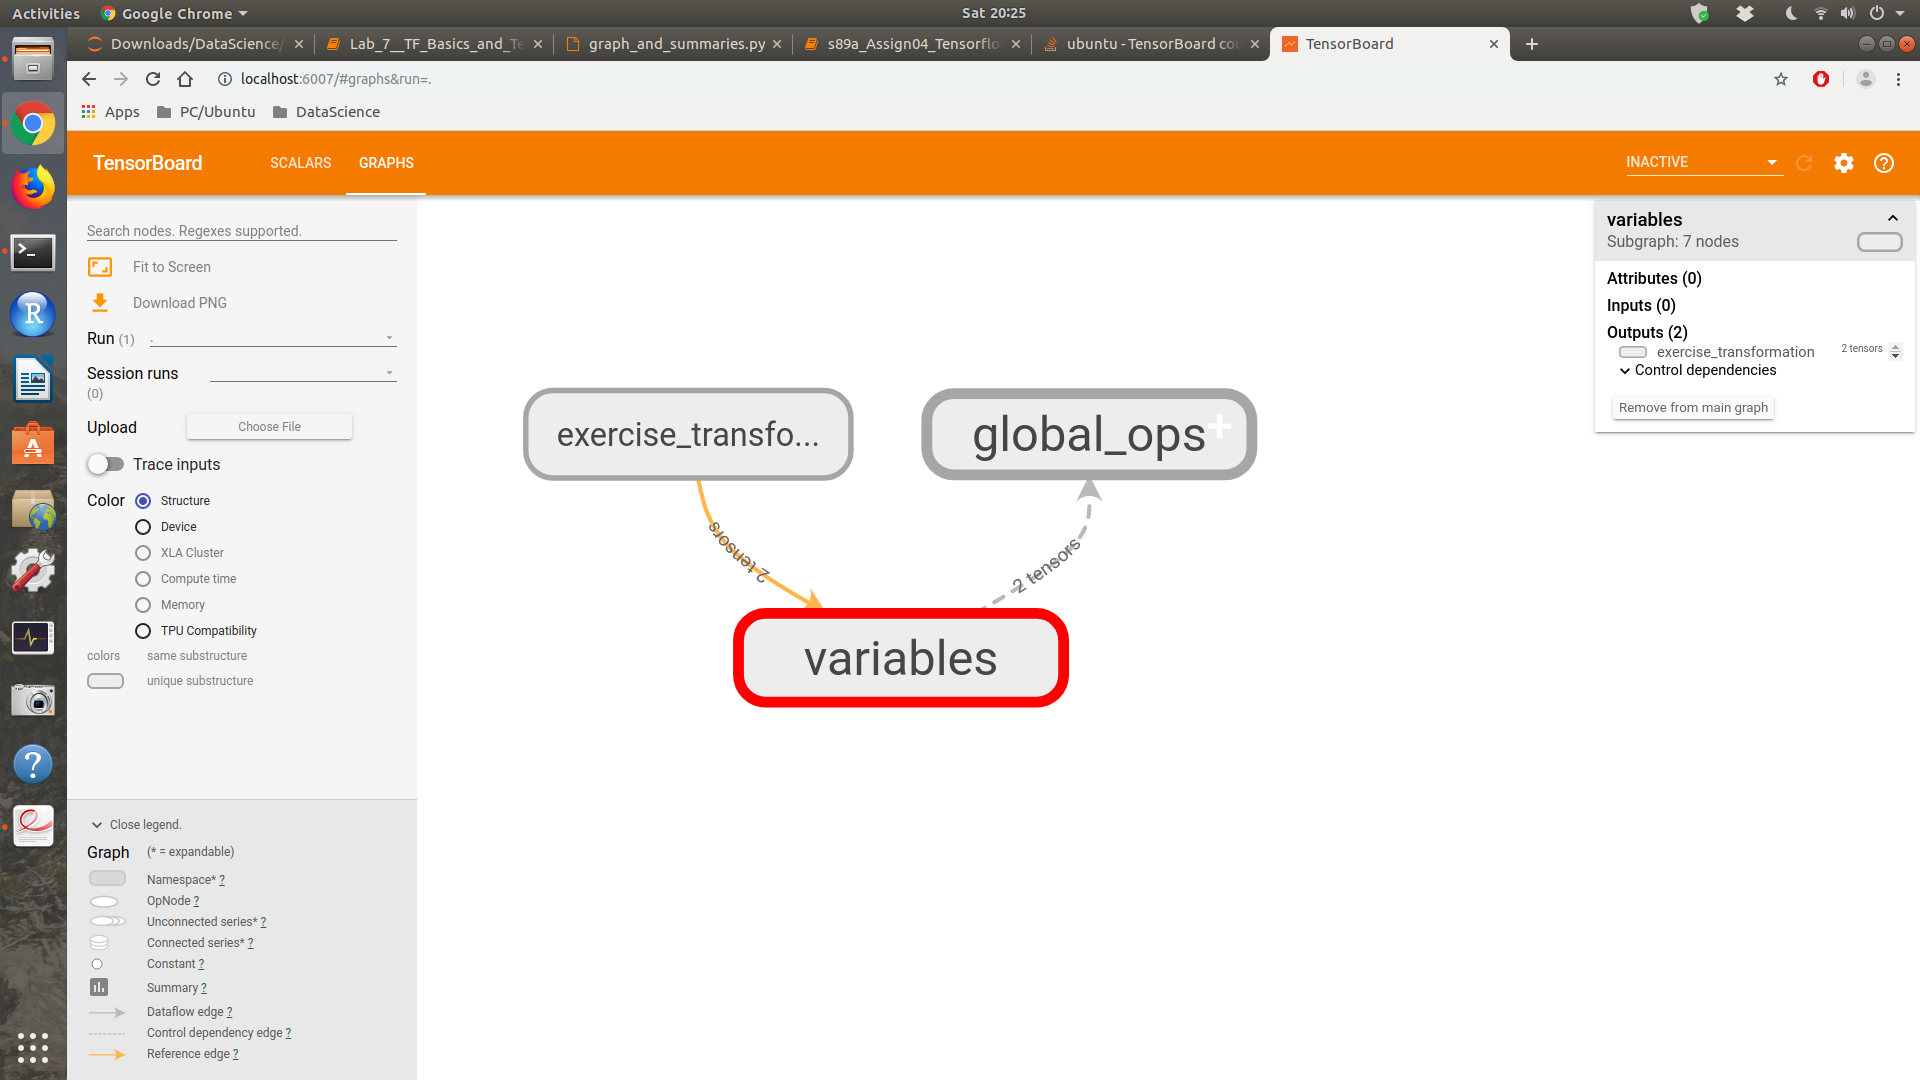

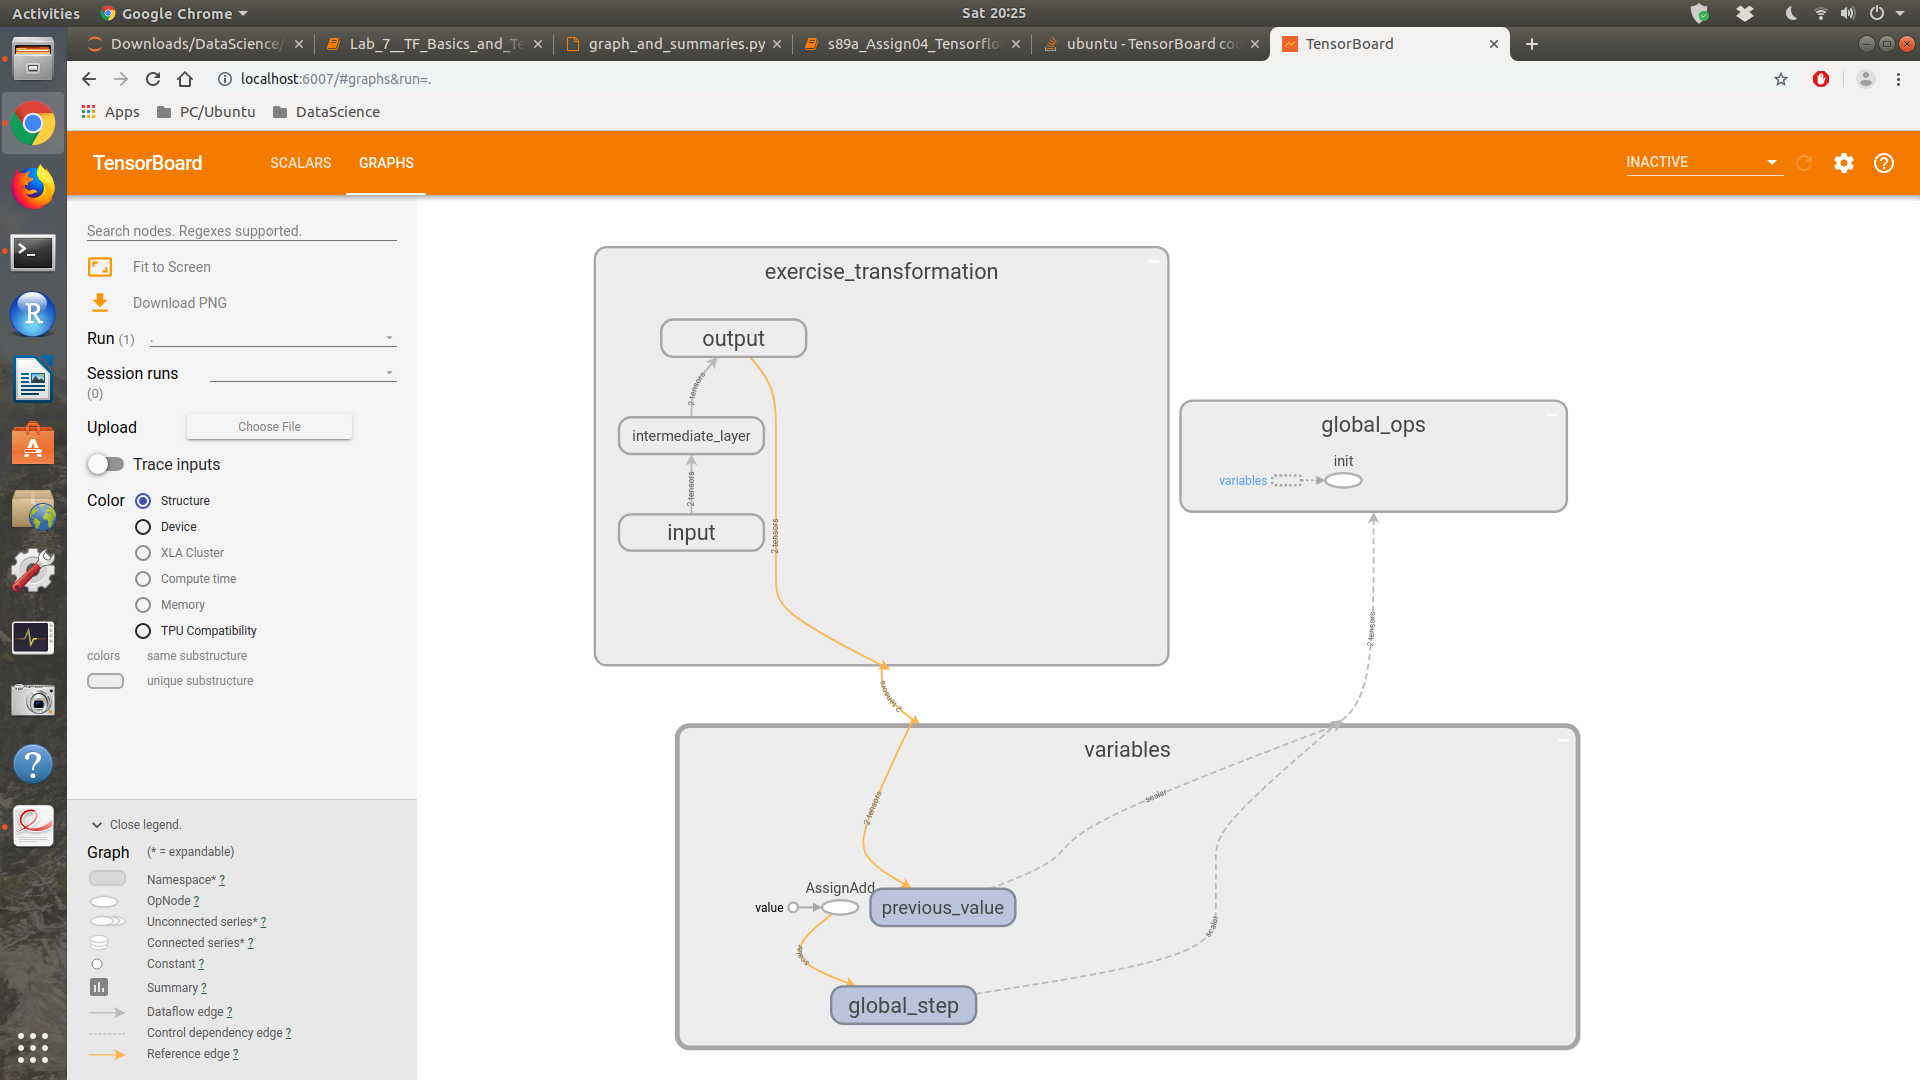

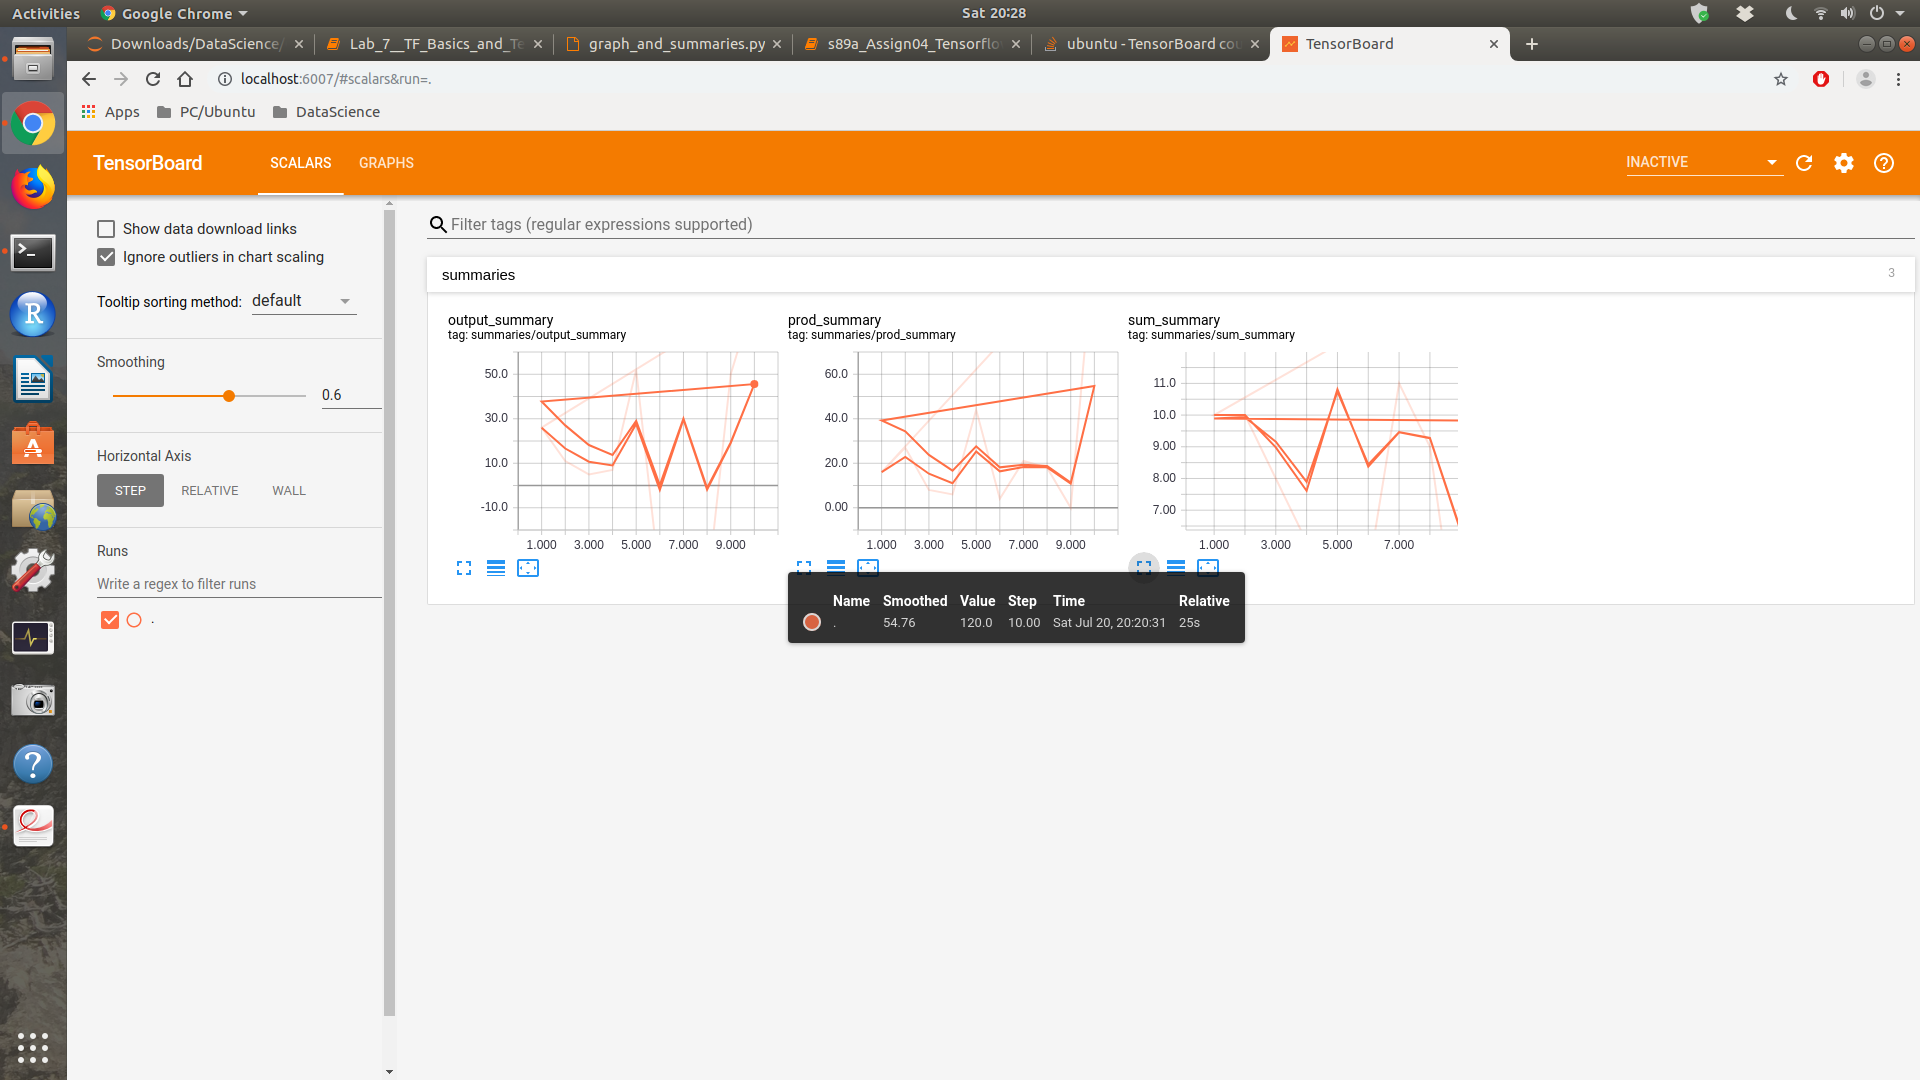

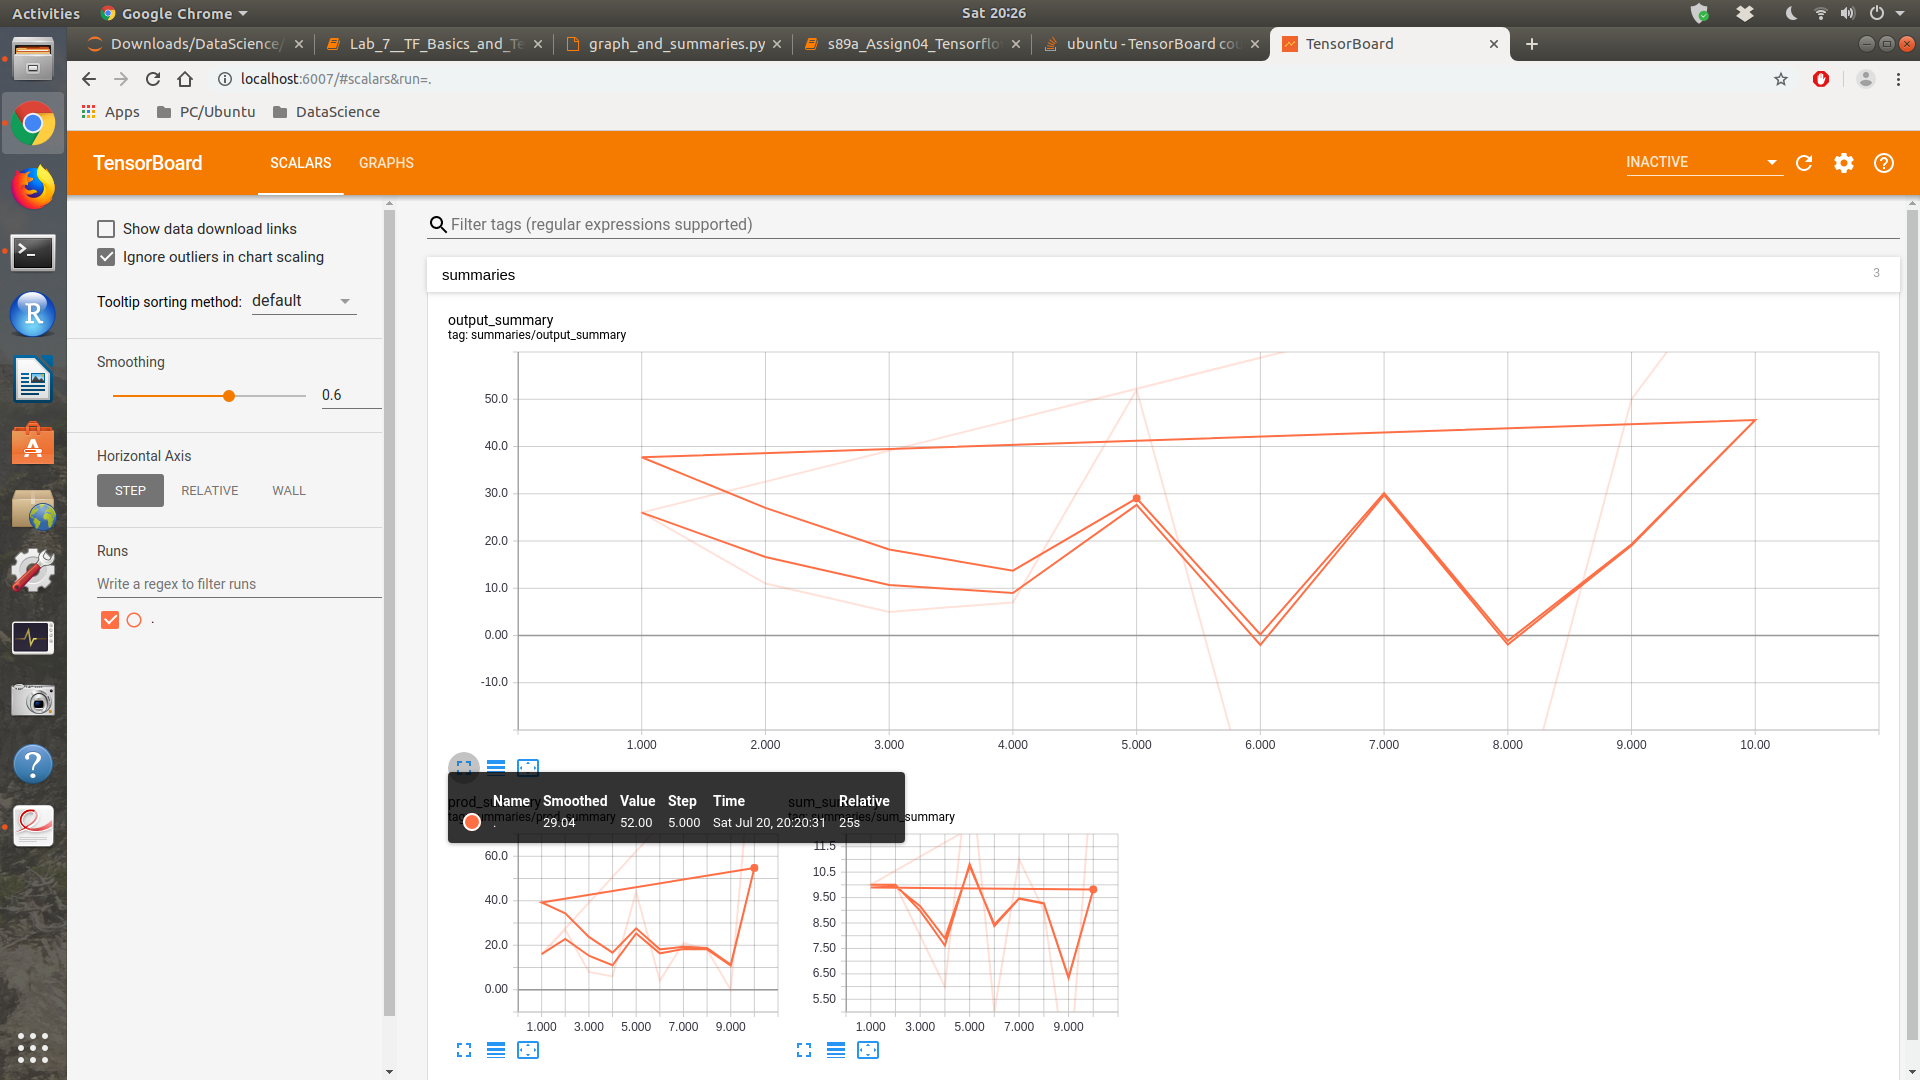

### Problem 4 (50%)
During the lecture on Neural Machine Translation we discussed the content of Jupyter notebook named: nmt_with_attention.ipynb. The notebook is from TensorFlow tutorial site which implemented Seq2Seq model for translation between two languages using GRU Encoder-Decoder with Attention. All supporting files are uploaded to the folder of Lecture 8.

Select a data set from the site http://www.manythings.org. Our suggestion is to use languages with a large data set, i.e. number of pairs of sentences.  Do not use German since we already have German examples in the notes. Set the number of sentences, the maximum length of sentences and the size of vocabulary to values close to those mentioned in notes. Set the size of the training and testing datasets to the values close to those mentioned in notes. Set the size of the context vector close to the one used in notes:
- Next, train both network and record the resulting BLUE scores.
- Change the type of cell in this network to LSTM. Train and run the network and compare with the BLUE score in the original configuration.
- Use three sentences of length, 5, 8 and 10 and record their translations produced by both versions of your network. 
- Finally, capture the attention heat maps for those 3 sentences. Examine the heat maps for any patterns. There might be none.

In [5]:
wd = !pwd
wd[0]

'/home/srk-apts/Downloads/DataScience/CS-S-89A/Homework/HW4'

In [6]:
# Download the file
path_to_zip = tf.keras.utils.get_file(
    wd[0]+'/data/fra-eng.zip',
    origin='http://download.tensorflow.org/data/fra-eng.zip',
#    'spa-eng.zip', origin='http://download.tensorflow.org/data/spa-eng.zip', 
    extract=True)

path_to_file = os.path.dirname(path_to_zip)+"/fra-eng/fra.txt"

In [8]:
import zipfile
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(path=wd[0]+'/data/fra-eng/')

In [9]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ." 
    # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    
    w = w.rstrip().strip()
    
    # adding a start and an end token to the sentence
    # so that the model know when to start and stop predicting.
    w = '<start> ' + w + ' <end>'
    return w

In [10]:
# 1. Remove the accents
# 2. Clean the sentences
# 3. Return word pairs in the format: [ENGLISH, SPANISH]
def create_dataset(path, num_examples):
    lines = open(path, encoding='UTF-8').read().strip().split('\n')
    
    word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]
    
    return word_pairs

In [11]:
# This class creates a word -> index mapping (e.g,. "dad" -> 5) and vice-versa 
# (e.g., 5 -> "dad") for each language,
class LanguageIndex():
    def __init__(self, lang):
        self.lang = lang
        self.word2idx = {}
        self.idx2word = {}
        self.vocab = set()
    
        self.create_index()
    
    def create_index(self):
        for phrase in self.lang:
            self.vocab.update(phrase.split(' '))

        self.vocab = sorted(self.vocab)

        self.word2idx['<pad>'] = 0
        for index, word in enumerate(self.vocab):
            self.word2idx[word] = index + 1

        for word, index in self.word2idx.items():
            self.idx2word[index] = word

In [12]:
def max_length(tensor):
    return max(len(t) for t in tensor)


def load_dataset(path, num_examples):
    # creating cleaned input, output pairs
    pairs = create_dataset(path, num_examples)

    # index language using the class defined above    
    inp_lang = LanguageIndex(sp for en, sp in pairs)
    targ_lang = LanguageIndex(en for en, sp in pairs)
    
    # Vectorize the input and target languages
    
    # Spanish sentences
    input_tensor = [[inp_lang.word2idx[s] for s in sp.split(' ')] for en, sp in pairs]
    
    # English sentences
    target_tensor = [[targ_lang.word2idx[s] for s in en.split(' ')] for en, sp in pairs]
    
    # Calculate max_length of input and output tensor
    # Here, we'll set those to the longest sentence in the dataset
    max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)
    
    # Padding the input and output tensor to the maximum length
    input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=max_length_inp,
                                                                 padding='post')
    
    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=max_length_tar, 
                                                                  padding='post')
    
    return input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_tar

In [13]:
# Try experimenting with the size of that dataset
num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_targ = load_dataset(path_to_file, num_examples)

In [14]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val)

(24000, 24000, 6000, 6000)

### Create a tf.data dataset

In [15]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
N_BATCH = BUFFER_SIZE//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word2idx)
vocab_tar_size = len(targ_lang.word2idx)

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [16]:
def gru(units):
  # If you have a GPU, we recommend using CuDNNGRU(provides a 3x speedup than GRU)
  # the code automatically does that.
  # gpu = False
    if tf.test.is_gpu_available(): 
  # if gpu: 
        return tf.keras.layers.CuDNNGRU(units, 
                                    return_sequences=True, 
                                    return_state=True, 
                                    recurrent_initializer='glorot_uniform')
    else:
        return tf.keras.layers.GRU(units, 
                               return_sequences=True, 
                               return_state=True, 
                               recurrent_activation='sigmoid', 
                               recurrent_initializer='glorot_uniform')

In [17]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.enc_units)
        
    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)        
        return output, state
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [18]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.dec_units)
        self.fc = tf.keras.layers.Dense(vocab_size)
        
        # used for attention
        self.W1 = tf.keras.layers.Dense(self.dec_units)
        self.W2 = tf.keras.layers.Dense(self.dec_units)
        self.V = tf.keras.layers.Dense(1)
        
    def call(self, x, hidden, enc_output):
        # enc_output shape == (batch_size, max_length, hidden_size)
        
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying tanh(FC(EO) + FC(H)) to self.V
        score = self.V(tf.nn.tanh(self.W1(enc_output) + self.W2(hidden_with_time_axis)))
        
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * enc_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)
        
        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        
        # passing the concatenated vector to the GRU
        output, state = self.gru(x)
        
        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))
        
        # output shape == (batch_size * 1, vocab)
        x = self.fc(output)
        
        return x, state, attention_weights
        
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.dec_units))

In [19]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

## Define the optimizer and the loss function

In [20]:
optimizer = tf.train.AdamOptimizer()

def loss_function(real, pred):
    mask = 1 - np.equal(real, 0)
    loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask
    return tf.reduce_mean(loss_)

## Checkpoints (Object-based saving)

In [21]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

## Training

1. Pass the *input* through the *encoder* which return *encoder output* and the *encoder hidden state*.
2. The encoder output, encoder hidden state and the decoder input (which is the *start token*) is passed to the decoder.
3. The decoder returns the *predictions* and the *decoder hidden state*.
4. The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.
5. Use *teacher forcing* to decide the next input to the decoder.
6. *Teacher forcing* is the technique where the *target word* is passed as the *next input* to the decoder.
7. The final step is to calculate the gradients and apply it to the optimizer and backpropagate.

In [22]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        loss = 0
        
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([targ_lang.word2idx['<start>']] * BATCH_SIZE, 1)       
            
            # Teacher forcing - feeding the target as the next input
            for t in range(1, targ.shape[1]):
                # passing enc_output to the decoder
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(targ[:, t], predictions)
                
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradients = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / N_BATCH))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 4.6324
Epoch 1 Batch 100 Loss 2.3443
Epoch 1 Batch 200 Loss 1.8233
Epoch 1 Batch 300 Loss 1.6425
Epoch 1 Loss 1.9619
Time taken for 1 epoch 76.52440977096558 sec

Epoch 2 Batch 0 Loss 1.4527
Epoch 2 Batch 100 Loss 1.3772
Epoch 2 Batch 200 Loss 1.2072
Epoch 2 Batch 300 Loss 1.1858
Epoch 2 Loss 1.2256
Time taken for 1 epoch 70.34023761749268 sec

Epoch 3 Batch 0 Loss 1.0613
Epoch 3 Batch 100 Loss 1.0156
Epoch 3 Batch 200 Loss 0.8394
Epoch 3 Batch 300 Loss 0.8060
Epoch 3 Loss 0.8633
Time taken for 1 epoch 69.79270362854004 sec

Epoch 4 Batch 0 Loss 0.7083
Epoch 4 Batch 100 Loss 0.6611
Epoch 4 Batch 200 Loss 0.5263
Epoch 4 Batch 300 Loss 0.5077
Epoch 4 Loss 0.5679
Time taken for 1 epoch 69.82441854476929 sec

Epoch 5 Batch 0 Loss 0.4221
Epoch 5 Batch 100 Loss 0.4424
Epoch 5 Batch 200 Loss 0.3153
Epoch 5 Batch 300 Loss 0.2983
Epoch 5 Loss 0.3600
Time taken for 1 epoch 69.66945385932922 sec

Epoch 6 Batch 0 Loss 0.2719
Epoch 6 Batch 100 Loss 0.2936
Epoch 6 Batch 200 Loss

## Translate

* The evaluate function is similar to the training loop, except we don't use *teacher forcing* here. The input to the decoder at each time step is its previous predictions along with the hidden state and the encoder output.
* Stop predicting when the model predicts the *end token*.
* And store the *attention weights for every time step*.

Note: The encoder output is calculated only once for one input.

In [ ]:
# evaluate the skill of the model
def evaluate_model(model, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append(raw_target.split())
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [23]:
def evaluate(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ):
    attention_plot = np.zeros((max_length_targ, max_length_inp))
    
    sentence = preprocess_sentence(sentence)

    inputs = [inp_lang.word2idx[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=max_length_inp, padding='post')
    inputs = tf.convert_to_tensor(inputs)
    
    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word2idx['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)
        
        # storing the attention weigths to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.idx2word[predicted_id] + ' '

        if targ_lang.idx2word[predicted_id] == '<end>':
            return result, sentence, attention_plot
        
        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [24]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')
    
    fontdict = {'fontsize': 14}
    
    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    plt.show()

In [25]:
def translate(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ):
    result, sentence, attention_plot = evaluate(sentence, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
        
    print('Input: {}'.format(sentence))
    print('Predicted translation: {}'.format(result))
    
    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

## Restore the latest checkpoint and test

In [26]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))